In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import os

In [2]:
### Read the files

from pathlib import Path

nb_path = Path(os.getcwd())
folder_path = os.path.dirname(nb_path)
folder = 'wp2-turbines'
directory = os.path.join(folder_path, folder)

wf = 'Princess Amalia'
years = ['2018','2019', '2020']

for i,year in enumerate(years):
    blob_list0 = [x for x in os.listdir(directory) if wf in x and year in x]  
    blob_list1 = os.listdir(os.path.join(directory, blob_list0[0]))
    # generate a df per year
    locals()["df_"+year] = pd.read_excel(os.path.join(directory,blob_list0[0],blob_list1[0]))
    for file in blob_list1:
        path = os.path.join(directory,blob_list0[0],file)   
        locals()["df_"+year] = locals()["df_"+year].append(pd.read_excel(path))
    #add year as series to distinguish
    locals()["df_"+year]['year']=int(year)
    if year=='2018':
        # clean/format data (NB: only needed for 2018)
        locals()["df_"+year]['Turbine'].replace({'PriseT48':'T48'},inplace=True)

        # %% Change turbine IDs to match 2019 inspection (T09 --> WTG09)
        pd.options.mode.chained_assignment = None  # to silence the warning for replaced turbine IDs
        for tt in locals()["df_"+year].Turbine:    
            locals()["df_"+year].Turbine[(locals()["df_"+year].Turbine == tt)] = 'WTG'+tt[-2:]

        # %% Change Severity to match 2019 inspection (III --> 3)
        for sev in np.unique(locals()["df_"+year].Severity):    
            if sev == 'V':
                locals()["df_"+year].Severity[(locals()["df_"+year].Severity == sev)] = 5
            elif sev == 'IV':
                locals()["df_"+year].Severity[(locals()["df_"+year].Severity == sev)] = 4    
            elif sev == 'III':
                locals()["df_"+year].Severity[(locals()["df_"+year].Severity == sev)] = 3
            elif sev == 'II':
                locals()["df_"+year].Severity[(locals()["df_"+year].Severity == sev)] = 2
            else:
                locals()["df_"+year].Severity[(locals()["df_"+year].Severity == sev)] = 1  
    
    

In [3]:
df_2018

DefectId Customer                   Windfarm Turbine Blade Side  \
0          1      GEV             Prinses Amalia   WTG19     A   LE   
1          2      GEV             Prinses Amalia   WTG19     A   LE   
2          3      GEV             Prinses Amalia   WTG19     A   LE   
3          4      GEV             Prinses Amalia   WTG19     A   LE   
4          5      GEV             Prinses Amalia   WTG19     A   LE   
..       ...      ...                        ...     ...   ...  ...   
17        18      GEV  Prinses Amalia April 2018   WTG09     A   SS   
18        19      GEV  Prinses Amalia April 2018   WTG09     A   LE   
19        20      GEV  Prinses Amalia April 2018   WTG09     A   LE   
20        21      GEV  Prinses Amalia April 2018   WTG09     A   LE   
21        22      GEV  Prinses Amalia April 2018   WTG09     A   TE   

   DefectType             Layer  Vertical_Distance  \
0       Voids  Surface Material               32.5   
1       Voids  Surface Material               31.0   
2       Voids  Surface Material               29.0   
3       Voids  Surface Material               28.0   
4       Voids            Filler               38.5   
..        ...               ...                ...   
17      Voids            Filler               32.0   
18   Chipping             Paint               31.0   
19      Voids             Paint               21.5   
20      Voids             Paint               21.0   
21      Voids             Paint                5.5   

                           UniqueiD  ... Images for report  Summary  WindFarm  \
0      Priset19-B-LE-c7f_045_0_3328  ...               NaN      NaN       NaN   
1   Priset19-B-LE-c7f_042_3328_3072  ...               NaN      NaN       NaN   
2   Priset19-B-LE-c7f_039_3584_3072  ...               NaN      NaN       NaN   
3   Priset19-B-LE-c7f_038_3072_3072  ...               NaN      NaN       NaN   
4   Priset19-B-LE-c7f_051_2048_2816  ...               NaN      NaN       NaN   
..                              ...  ...               ...      ...       ...   
17  PriseT09-B-LW-54L_074_2304_1536  ...               NaN      NaN       NaN   
18  PriseT09-B-LE-VBI_041_1792_3328  ...               NaN      NaN       NaN   
19  PriseT09-B-LE-VBI_028_2560_3072  ...               NaN      NaN       NaN   
20  PriseT09-B-LE-VBI_028_1792_3328  ...               NaN      NaN       NaN   
21  PriseT09-B-TE-PKB_006_3072_3328  ...               NaN      NaN       NaN   

   Image for report summary  Unnamed: 14 Unnamed: 15  image for report  \
0               NaN     NaN          NaN         NaN               NaN   
1               NaN     NaN          NaN         NaN               NaN   
2               NaN     NaN          NaN         NaN               NaN   
3               NaN     NaN          NaN         NaN               NaN   
4               NaN     NaN          NaN         NaN               NaN   
..              ...     ...          ...         ...               ...   
17              NaN     NaN          NaN         NaN               NaN   
18              NaN     NaN          NaN         NaN               NaN   
19              NaN     NaN          NaN         NaN               NaN   
20              NaN     NaN          NaN         NaN               NaN   
21              NaN     NaN          NaN         NaN               NaN   

                                     Executiv summary  year  
0                                                 NaN  2018  
1                                                 NaN  2018  
2                                                 NaN  2018  
3                                                 NaN  2018  
4                                                 NaN  2018  
..                                                ...   ...  
17                                                NaN  2018  
18                                                NaN  2018  
19                                                NaN  2018  
20                  

In [4]:
df_2019

Defect Id Customer Windfarm Turbine Blade Surface Area Defect Type  \
0        A01    ENECO     PAWP   WTG51     A           LE     Peeling   
1        A02    ENECO     PAWP   WTG51     A           LE     Erosion   
2        A03    ENECO     PAWP   WTG51     A           LE     Peeling   
3        A04    ENECO     PAWP   WTG51     A           LE     Peeling   
4        A05    ENECO     PAWP   WTG51     A           LE     Peeling   
..       ...      ...      ...     ...   ...          ...         ...   
33       C09    ENECO     PAWP   WTG21     C           LE       Voids   
34       C10    ENECO     PAWP   WTG21     C           LE       Voids   
35       C11    ENECO     PAWP   WTG21     C           LE       Voids   
36       C12    ENECO     PAWP   WTG21     C           LE       Voids   
37       C13    ENECO     PAWP   WTG21     C           LE       Voids   

               Layer  Vertical Distance  Severity  \
0   Surface Material               39.0         3   
1   Surface Material               38.5         3   
2   Surface Material               38.0         3   
3   Surface Material               35.0         3   
4   Surface Material               34.5         3   
..               ...                ...       ...   
33             Paint               33.5         1   
34            Filler               29.5         1   
35             Paint               28.0         1   
36            Filler               24.0         1   
37             Paint               22.5         1   

                                              Summary  Unnamed: 10  year  
0   A few peeling defects on blade A LE were obser...          NaN  2019  
1                                                 NaN          NaN  2019  
2                                                 NaN          NaN  2019  
3                                                 NaN          NaN  2019  
4                                                 NaN          NaN  2019  
..                                                ...          ...   ...  
33                                                NaN          NaN  2019  
34                                                NaN          NaN  2019  
35                                                NaN          NaN  2019  
36                                                NaN          NaN  2019  
37                                                NaN          NaN  2019  

[3553 rows x 13 columns]

In [5]:
df_2020

WindFarm TurbineName  ReportDefectId Blade Surface DefectType  \
0        PAWP       WTG01            2809     A      LE   Chipping   
1        PAWP       WTG01            3131     A      LE      Voids   
2        PAWP       WTG01            2899     A      LE   Chipping   
3        PAWP       WTG01            2968     A      LE      Voids   
4        PAWP       WTG01            2816     A      LE      Voids   
...       ...         ...             ...   ...     ...        ...   
2177     PAWP       WTG60            2773     C      LE    Peeling   
2178     PAWP       WTG60            2582     C      LE   Chipping   
2179     PAWP       WTG60            2737     C      LE    Erosion   
2180     PAWP       WTG60            2677     C      PS      Voids   
2181     PAWP       WTG60            2694     C      SS    Peeling   

            Layer  Severity  DistanceFromHub RepairRecommendation  \
0     Surface Mat         2            10.04            No action   
1          Filler         1            10.58            No action   
2     Surface Mat         2            16.30            No action   
3          Filler         1            18.48            No action   
4          Filler         1            21.19            No action   
...           ...       ...              ...                  ...   
2177  Surface Mat         3            31.41            No action   
2178  Surface Mat         3            36.39          Repair 2021   
2179  Surface Mat         3            38.23          Repair 2021   
2180  Surface Mat         2            36.10            No action   
2181       Filler         1            24.92            No action   

     MarkedForRepair  year  
0                NaT  2020  
1                NaT  2020  
2                NaT  2020  
3                NaT  2020  
4                NaT  2020  
...              ...   ...  
2177             NaT  2020  
2178      2020-12-18  2020  
2179      2020-12-18  2020  
2180             NaT  2020  
2181             NaT  2020  

[4364 rows x 12 columns]

In [6]:
# specific naming conventions per year
df_2019.columns = df_2019.columns.str.replace('Defect Id', 'DefectId')  
df_2019.columns = df_2019.columns.str.replace('Vertical Distance', 'Vertical_Distance')
df_2019.columns = df_2019.columns.str.replace('Surface Area', 'Side')
df_2019.columns = df_2019.columns.str.replace('Defect Type', 'DefectType')

df_2020.columns = df_2020.columns.str.replace('TurbineName', 'Turbine')
df_2020.columns = df_2020.columns.str.replace('Surface', 'Side')
df_2020.columns = df_2020.columns.str.replace('ReportDefectId', 'DefectId')
df_2020.columns = df_2020.columns.str.replace('DistanceFromHub', 'Vertical_Distance')

In [7]:
# filter to regions of interest

rotor_radius=40 #V80
factor=2/3 

df_2018_dam=df_2018.loc[(df_2018['Vertical_Distance'] >= rotor_radius*factor) & (df_2018['Side'] == 'LE')]
df_2018_dam = df_2018_dam[['Turbine','Blade','DefectType','Severity', 'year']]
df_2018_dam.reset_index(drop=True, inplace=True)

df_2019_dam=df_2019.loc[(df_2019['Vertical_Distance'] >= rotor_radius*factor) & (df_2019['Side'] == 'LE')]
df_2019_dam = df_2019_dam[['Turbine','Blade','DefectType','Severity', 'year']]
df_2019_dam.reset_index(drop=True, inplace=True)

df_2020_dam=df_2020.loc[(df_2020['Vertical_Distance'] >= rotor_radius*factor) & (df_2020['Side'] == 'LE')]
df_2020_dam = df_2020_dam[['Turbine','Blade','DefectType','Severity', 'year']]
df_2020_dam.reset_index(drop=True, inplace=True)

In [8]:
df_2018_dam

Turbine Blade DefectType Severity  year
0     WTG19     A      Voids        3  2018
1     WTG19     A      Voids        3  2018
2     WTG19     A      Voids        3  2018
3     WTG19     A      Voids        3  2018
4     WTG19     A      Voids        2  2018
..      ...   ...        ...      ...   ...
573   WTG09     A    Peeling        3  2018
574   WTG09     A    Peeling        3  2018
575   WTG09     A   Chipping        3  2018
576   WTG09     A      Voids        1  2018
577   WTG09     A   Chipping        1  2018

[578 rows x 5 columns]

In [9]:
df_2019_dam

Turbine Blade DefectType  Severity  year
0      WTG51     A    Peeling         3  2019
1      WTG51     A    Erosion         3  2019
2      WTG51     A    Peeling         3  2019
3      WTG51     A    Peeling         3  2019
4      WTG51     A    Peeling         3  2019
...      ...   ...        ...       ...   ...
1592   WTG21     C      Voids         1  2019
1593   WTG21     C      Voids         1  2019
1594   WTG21     C      Voids         1  2019
1595   WTG21     C      Voids         1  2019
1596   WTG21     C      Voids         1  2019

[1597 rows x 5 columns]

In [10]:
df_2020_dam

Turbine Blade DefectType  Severity  year
0      WTG01     A      Voids         1  2020
1      WTG01     A      Voids         1  2020
2      WTG01     A      Voids         1  2020
3      WTG01     A      Voids         2  2020
4      WTG01     A   Chipping         3  2020
...      ...   ...        ...       ...   ...
1701   WTG60     B    Erosion         3  2020
1702   WTG60     B    Erosion         3  2020
1703   WTG60     C    Peeling         3  2020
1704   WTG60     C   Chipping         3  2020
1705   WTG60     C    Erosion         3  2020

[1706 rows x 5 columns]

In [11]:
# Define defect encoding for all observations
years = ['2018', '2019', '2020']
pd.set_option('precision', 0)

for i,year in enumerate(years):
    locals()["df_"+year+"_dam"]['defect_code'] = np.zeros(shape=(len(locals()["df_"+year+"_dam"]),1))
    for i, defect in enumerate(locals()["df_"+year+"_dam"].DefectType):
        if defect == 'Voids':
            locals()["df_"+year+"_dam"]['defect_code'][i] = 1
        elif defect == 'Chipping':
            locals()["df_"+year+"_dam"]['defect_code'][i] = 2
        elif defect == 'Peeling': 
            locals()["df_"+year+"_dam"]['defect_code'][i] = 3
        elif defect == 'Erosion':
            locals()["df_"+year+"_dam"]['defect_code'][i] = 4
    locals()["df_"+year+"_dam"].columns = locals()["df_"+year+"_dam"].columns.str.replace('Severity', 'Severity_'+str(year))      
    locals()["df_"+year+"_dam"].columns = locals()["df_"+year+"_dam"].columns.str.replace('defect_code', 'defect_code'+str(year))  
    locals()["df_"+year+"_dam"].drop(columns=['DefectType', 'year'], inplace=True)
df_2018_dam

Turbine Blade Severity_2018  defect_code2018
0     WTG19     A             3                1
1     WTG19     A             3                1
2     WTG19     A             3                1
3     WTG19     A             3                1
4     WTG19     A             2                1
..      ...   ...           ...              ...
573   WTG09     A             3                3
574   WTG09     A             3                3
575   WTG09     A             3                2
576   WTG09     A             1                1
577   WTG09     A             1                2

[578 rows x 4 columns]

In [12]:
df_2019_dam

Turbine Blade  Severity_2019  defect_code2019
0      WTG51     A              3                3
1      WTG51     A              3                4
2      WTG51     A              3                3
3      WTG51     A              3                3
4      WTG51     A              3                3
...      ...   ...            ...              ...
1592   WTG21     C              1                1
1593   WTG21     C              1                1
1594   WTG21     C              1                1
1595   WTG21     C              1                1
1596   WTG21     C              1                1

[1597 rows x 4 columns]

In [13]:
df_2020_dam

Turbine Blade  Severity_2020  defect_code2020
0      WTG01     A              1                1
1      WTG01     A              1                1
2      WTG01     A              1                1
3      WTG01     A              2                1
4      WTG01     A              3                2
...      ...   ...            ...              ...
1701   WTG60     B              3                4
1702   WTG60     B              3                4
1703   WTG60     C              3                3
1704   WTG60     C              3                2
1705   WTG60     C              3                4

[1706 rows x 4 columns]

In [14]:
### DAMAGE PROGRESS - EARLIER DAYS! 2013-2018-2019

# Fill in zero-damage for no damage inspections in earlier inspections
df_PA_dam = df_2018_dam.merge(df_2019_dam, how='inner', on=['Turbine', 'Blade'], sort=True)
df_PA_dam.fillna(0, inplace=True)
df_PA_dam[['Severity_2018', 'Severity_2019','defect_code2018','defect_code2019']].astype(int, errors='ignore')
df_PA_dam

###
# Both severity and defect code should increase for damage progression!!! #
# or same defect code, larger severity
# what about same everity but another defect type?
###

df_PA_dam['prog_2019'] = '0'
for i in range(0, len(df_PA_dam)):
    if df_PA_dam.defect_code2019[i] >= df_PA_dam.defect_code2018[i] and df_PA_dam.Severity_2019[i] >= df_PA_dam.Severity_2018[i]:
        df_PA_dam['prog_2019'][i] = str(df_PA_dam.defect_code2018[i])[0]+str(df_PA_dam.defect_code2019[i])[0]+str(df_PA_dam.Severity_2018[i])[0]+str(df_PA_dam.Severity_2019[i])[0]    
    elif df_PA_dam.defect_code2019[i] == df_PA_dam.defect_code2018[i] and df_PA_dam.Severity_2019[i] == df_PA_dam.Severity_2018[i]:
        df_PA_dam['prog_2019'][i] = str(df_PA_dam.defect_code2018[i])[0]+str(df_PA_dam.defect_code2019[i])[0]+str(df_PA_dam.Severity_2018[i])[0]+str(df_PA_dam.Severity_2019[i])[0]
    elif df_PA_dam.defect_code2019[i] < df_PA_dam.defect_code2018[i] or df_PA_dam.Severity_2019[i] < df_PA_dam.Severity_2018[i]:
        df_PA_dam['prog_2019'][i] = '-'+str(df_PA_dam.defect_code2018[i])[0]+str(df_PA_dam.defect_code2019[i])[0]+str(df_PA_dam.Severity_2018[i])[0]+str(df_PA_dam.Severity_2019[i])[0]

###
### Assuming 0-damage at 2013 (when weather time series start) ####
###
df_PA_dam['defect_code2013'] = np.zeros(len(df_PA_dam))
df_PA_dam['Severity_2013'] = np.zeros(len(df_PA_dam))

df_PA_dam['prog_2018'] = '0'
for i in range(0, len(df_PA_dam)):
    if df_PA_dam.defect_code2018[i] >= df_PA_dam.defect_code2013[i] and df_PA_dam.Severity_2018[i] >= df_PA_dam.Severity_2013[i]:
        df_PA_dam['prog_2018'][i] = str(df_PA_dam.defect_code2013[i])[0]+str(df_PA_dam.defect_code2018[i])[0]+str(df_PA_dam.Severity_2013[i])[0]+str(df_PA_dam.Severity_2018[i])[0]    
    elif df_PA_dam.defect_code2018[i] == df_PA_dam.defect_code2013[i] and df_PA_dam.Severity_2018[i] == df_PA_dam.Severity_2013[i]:
        df_PA_dam['prog_2018'][i] = str(df_PA_dam.defect_code2013[i])[0]+str(df_PA_dam.defect_code2018[i])[0]+str(df_PA_dam.Severity_2013[i])[0]+str(df_PA_dam.Severity_2018[i])[0]
    elif df_PA_dam.defect_code2018[i] < df_PA_dam.defect_code2013[i] or df_PA_dam.Severity_2018[i] < df_PA_dam.Severity_2013[i]:
        df_PA_dam['prog_2018'][i] = '-'+str(df_PA_dam.defect_code2013[i])[0]+str(df_PA_dam.defect_code2018[i])[0]+str(df_PA_dam.Severity_2013[i])[0]+str(df_PA_dam.Severity_2018[i])[0]
df_PA_dam

Turbine Blade  Severity_2018  defect_code2018  Severity_2019  \
0      WTG09     A              3                3              2   
1      WTG09     A              3                3              1   
2      WTG09     A              3                3              1   
3      WTG09     A              3                3              1   
4      WTG09     A              3                3              1   
...      ...   ...            ...              ...            ...   
5416   WTG59     C              2                1              3   
5417   WTG59     C              2                1              3   
5418   WTG59     C              2                1              3   
5419   WTG59     C              2                1              3   
5420   WTG59     C              2                1              2   

      defect_code2019 prog_2019  defect_code2013  Severity_2013 prog_2018  
0                   2     -3232                0              0      0303  
1                   1     -3131                0              0      0303  
2                   1     -3131                0              0      0303  
3                   1     -3131                0              0      0303  
4                   1     -3131                0              0      0303  
...               ...       ...              ...            ...       ...  
5416                2      1223                0              0      0102  
5417                1      1123                0              0      0102  
5418                1      1123                0              0      0102  
5419                1      1123                0              0      0102  
5420                1      1122                0              0      0102  

[5421 rows x 10 columns]

In [15]:
### DAMAGE PROGRESS - RECENTLY! 2019-2020

# Fill in zero-damage for no damage inspections in earlier inspections
df_PA_dam_new = df_2019_dam.merge(df_2020_dam, how='inner', on=['Turbine', 'Blade'], sort=True)
df_PA_dam_new.fillna(0, inplace=True)
df_PA_dam_new[['Severity_2020', 'Severity_2020','defect_code2020','defect_code2020']].astype(int, errors='ignore')
df_PA_dam_new
# df_PA_dam_new[900:920]

###
# Both severity and defect code should increase for damage progression!!! #
# or same defect code, larger severity
# what about same everity but another defect type?
###

df_PA_dam_new['prog_2020'] = '0'
for i in range(0, len(df_PA_dam_new)):
    if df_PA_dam_new.defect_code2020[i] >= df_PA_dam_new.defect_code2019[i] and df_PA_dam_new.Severity_2020[i] >= df_PA_dam_new.Severity_2019[i]:
        df_PA_dam_new['prog_2020'][i] = str(df_PA_dam_new.defect_code2019[i])[0]+str(df_PA_dam_new.defect_code2020[i])[0]+str(df_PA_dam_new.Severity_2019[i])[0]+str(df_PA_dam_new.Severity_2020[i])[0]    
    elif df_PA_dam_new.defect_code2020[i] == df_PA_dam_new.defect_code2019[i] and df_PA_dam_new.Severity_2020[i] == df_PA_dam_new.Severity_2019[i]:
        df_PA_dam_new['prog_2020'][i] = str(df_PA_dam_new.defect_code2019[i])[0]+str(df_PA_dam_new.defect_code2020[i])[0]+str(df_PA_dam_new.Severity_2019[i])[0]+str(df_PA_dam_new.Severity_2020[i])[0]
    elif df_PA_dam_new.defect_code2020[i] < df_PA_dam_new.defect_code2019[i] or df_PA_dam_new.Severity_2020[i] < df_PA_dam_new.Severity_2019[i]:
        df_PA_dam_new['prog_2020'][i] = '-'+str(df_PA_dam_new.defect_code2019[i])[0]+str(df_PA_dam_new.defect_code2020[i])[0]+str(df_PA_dam_new.Severity_2019[i])[0]+str(df_PA_dam_new.Severity_2020[i])[0]

df_PA_dam_new

Turbine Blade  Severity_2019  defect_code2019  Severity_2020  \
0       WTG01     A              3                2              1   
1       WTG01     A              3                2              1   
2       WTG01     A              3                2              1   
3       WTG01     A              3                2              2   
4       WTG01     A              3                2              3   
...       ...   ...            ...              ...            ...   
16339   WTG60     C              1                1              3   
16340   WTG60     C              1                1              3   
16341   WTG60     C              1                1              3   
16342   WTG60     C              1                1              3   
16343   WTG60     C              1                1              3   

       defect_code2020 prog_2020  
0                    1     -2131  
1                    1     -2131  
2                    1     -2131  
3                    1     -2132  
4                    2      2233  
...                ...       ...  
16339                2      1213  
16340                4      1413  
16341                3      1313  
16342                2      1213  
16343                4      1413  

[16344 rows x 7 columns]

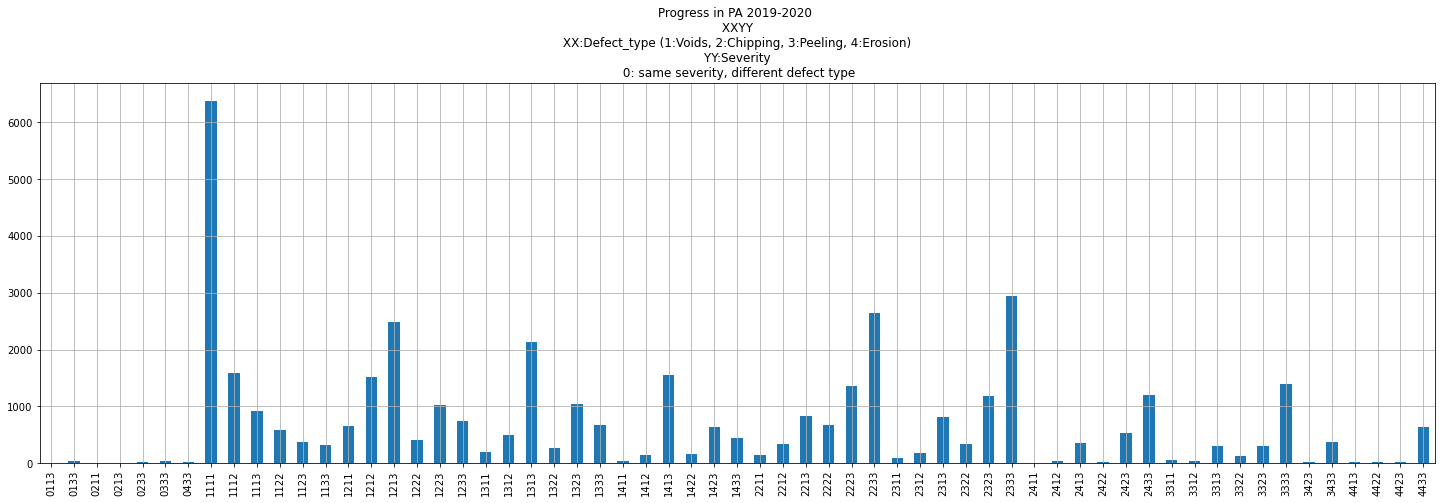

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))
df_PA_dam_new.prog_2020[~df_PA_dam_new.prog_2020.str.startswith('-')].apply(pd.value_counts).sum().sort_index().plot(kind='bar')
plt.grid()
plt.title('Progress in PA 2019-2020 \n XXYY \n XX:Defect_type (1:Voids, 2:Chipping, 3:Peeling, 4:Erosion) \n YY:Severity \n 0: same severity, different defect type')
plt.show()

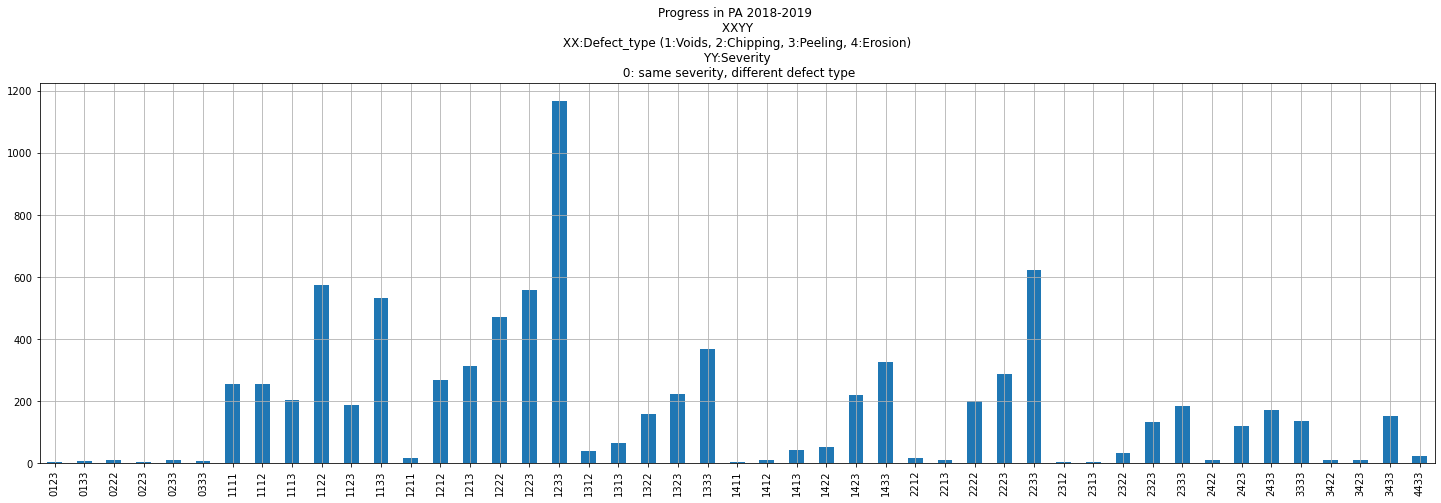

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))
df_PA_dam.prog_2019[~df_PA_dam.prog_2019.str.startswith('-')].apply(pd.value_counts).sum().sort_index().plot(kind='bar')
# df_PA_dam.prog_2019[df_PA_dam.prog_2019!='0'].apply(pd.value_counts).sum().sort_index().plot(kind='bar')
plt.grid()
plt.title('Progress in PA 2018-2019 \n XXYY \n XX:Defect_type (1:Voids, 2:Chipping, 3:Peeling, 4:Erosion) \n YY:Severity \n 0: same severity, different defect type')
plt.show()

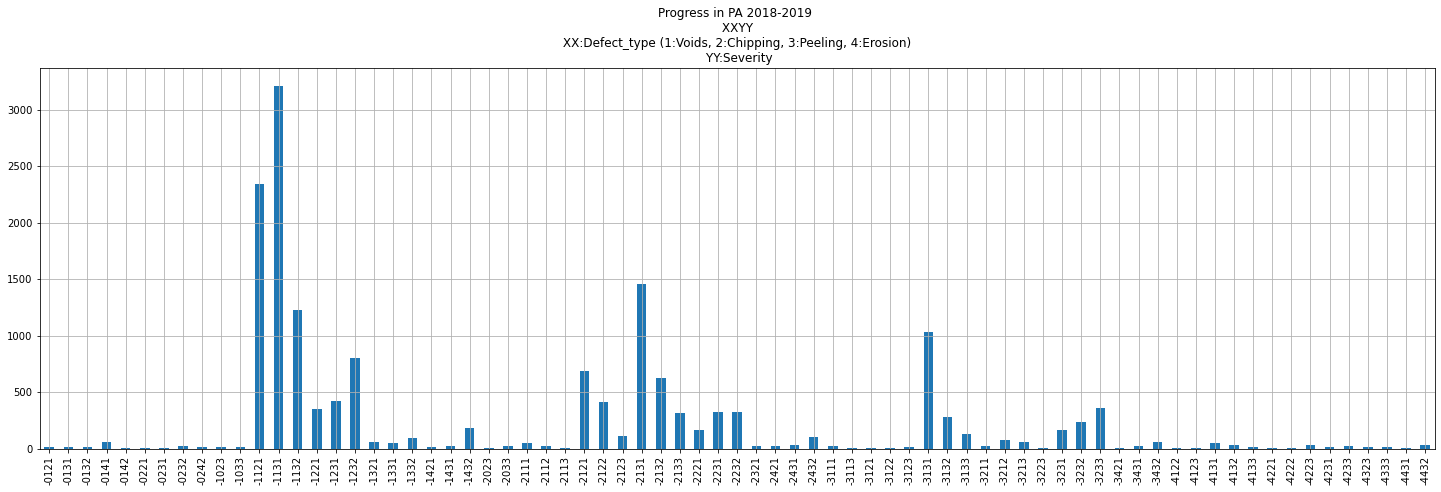

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))
df_PA_dam.prog_2019[df_PA_dam.prog_2019.str.startswith('-')].apply(pd.value_counts).sum().sort_index().plot(kind='bar')
# df_PA_dam.prog_2019[df_PA_dam.prog_2019!='0'].apply(pd.value_counts).sum().sort_index().plot(kind='bar')
plt.grid()
plt.title('Progress in PA 2018-2019 \n XXYY \n XX:Defect_type (1:Voids, 2:Chipping, 3:Peeling, 4:Erosion) \n YY:Severity')
plt.show()

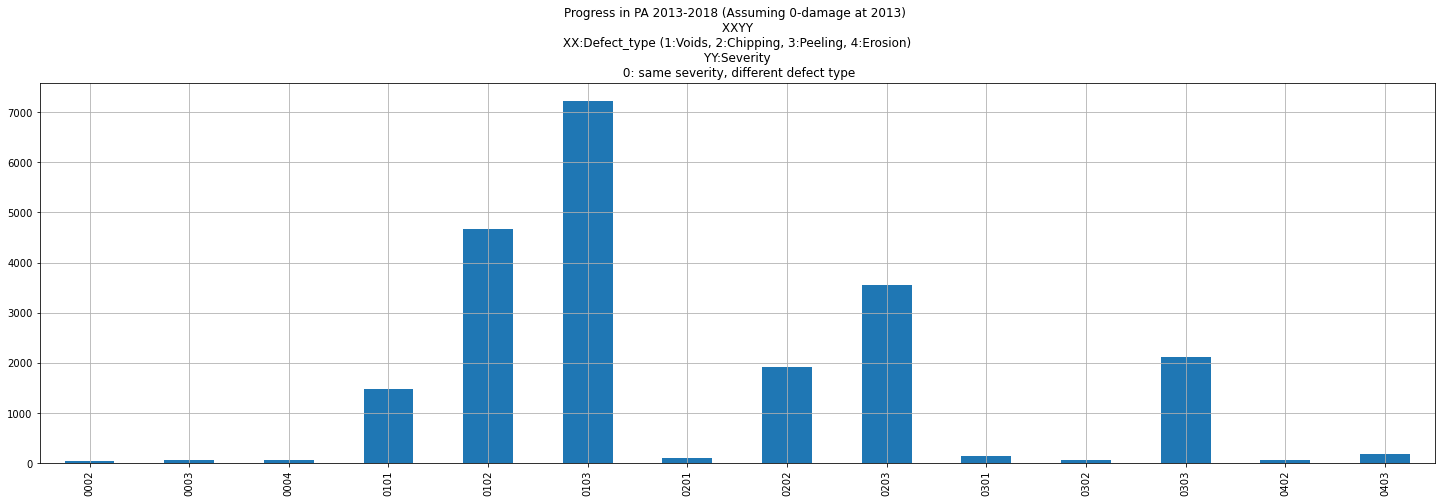

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))
df_PA_dam.prog_2018[~df_PA_dam.prog_2018.str.startswith('-')].apply(pd.value_counts).sum().sort_index().plot(kind='bar')
# df_PA_dam.prog_2019[df_PA_dam.prog_2019!='0'].apply(pd.value_counts).sum().sort_index().plot(kind='bar')
plt.grid()
plt.title('Progress in PA 2013-2018 (Assuming 0-damage at 2013) \n XXYY \n XX:Defect_type (1:Voids, 2:Chipping, 3:Peeling, 4:Erosion) \n YY:Severity \n 0: same severity, different defect type')
plt.show()

In [20]:
# "Weighting" on the damage
### Defect 'increase' (type change) weight = 1
def_weight=1
### Severity increase weight = 2
sev_weight=2

df_PA_dam_new['damage_2020'] = np.zeros(shape=(len(df_PA_dam_new),1))
for i in range(0,len(df_PA_dam_new)):
    if df_PA_dam_new.prog_2020[i].startswith('-') or df_PA_dam_new.prog_2020[i]=='0':
        df_PA_dam_new['damage_2020'][i] = 0
    else:
        df_PA_dam_new['damage_2020'][i] = def_weight*(int(df_PA_dam_new.prog_2020[i][1])-int(df_PA_dam_new.prog_2020[i][0]))+sev_weight*(int(df_PA_dam_new.prog_2020[i][3])-int(df_PA_dam_new.prog_2020[i][2]))


df_PA_dam['damage_2019'] = np.zeros(shape=(len(df_PA_dam),1))
for i in range(0,len(df_PA_dam)):
    if df_PA_dam.prog_2019[i].startswith('-') or df_PA_dam.prog_2019[i]=='0':
        df_PA_dam['damage_2019'][i] = 0
    else:
        df_PA_dam['damage_2019'][i] = def_weight*(int(df_PA_dam.prog_2019[i][1])-int(df_PA_dam.prog_2019[i][0]))+sev_weight*(int(df_PA_dam.prog_2019[i][3])-int(df_PA_dam.prog_2019[i][2]))



df_PA_dam['damage_2018'] = np.zeros(shape=(len(df_PA_dam),1))
for i in range(0,len(df_PA_dam)):
    if df_PA_dam.prog_2018[i].startswith('-') or df_PA_dam.prog_2018[i]=='0':
        df_PA_dam['damage_2018'][i] = 0
    else:
        df_PA_dam['damage_2018'][i] = def_weight*(int(df_PA_dam.prog_2018[i][1])-int(df_PA_dam.prog_2018[i][0]))+sev_weight*(int(df_PA_dam.prog_2018[i][3])-int(df_PA_dam.prog_2018[i][2]))

df_PA_dam

Turbine Blade  Severity_2018  defect_code2018  Severity_2019  \
0      WTG09     A              3                3              2   
1      WTG09     A              3                3              1   
2      WTG09     A              3                3              1   
3      WTG09     A              3                3              1   
4      WTG09     A              3                3              1   
...      ...   ...            ...              ...            ...   
5416   WTG59     C              2                1              3   
5417   WTG59     C              2                1              3   
5418   WTG59     C              2                1              3   
5419   WTG59     C              2                1              3   
5420   WTG59     C              2                1              2   

      defect_code2019 prog_2019  defect_code2013  Severity_2013 prog_2018  \
0                   2     -3232                0              0      0303   
1                   1     -3131                0              0      0303   
2                   1     -3131                0              0      0303   
3                   1     -3131                0              0      0303   
4                   1     -3131                0              0      0303   
...               ...       ...              ...            ...       ...   
5416                2      1223                0              0      0102   
5417                1      1123                0              0      0102   
5418                1      1123                0              0      0102   
5419                1      1123                0              0      0102   
5420                1      1122                0              0      0102   

      damage_2019  damage_2018  
0               0            9  
1               0            9  
2               0            9  
3               0            9  
4               0            9  
...           ...          ...  
5416            3            5  
5417            2            5  
5418            2            5  
5419            2            5  
5420            0            5  

[5421 rows x 12 columns]

In [21]:
df_PA_dam_new

Turbine Blade  Severity_2019  defect_code2019  Severity_2020  \
0       WTG01     A              3                2              1   
1       WTG01     A              3                2              1   
2       WTG01     A              3                2              1   
3       WTG01     A              3                2              2   
4       WTG01     A              3                2              3   
...       ...   ...            ...              ...            ...   
16339   WTG60     C              1                1              3   
16340   WTG60     C              1                1              3   
16341   WTG60     C              1                1              3   
16342   WTG60     C              1                1              3   
16343   WTG60     C              1                1              3   

       defect_code2020 prog_2020  damage_2020  
0                    1     -2131            0  
1                    1     -2131            0  
2                    1     -2131            0  
3                    1     -2132            0  
4                    2      2233            0  
...                ...       ...          ...  
16339                2      1213            5  
16340                4      1413            7  
16341                3      1313            6  
16342                2      1213            5  
16343                4      1413            7  

[16344 rows x 8 columns]

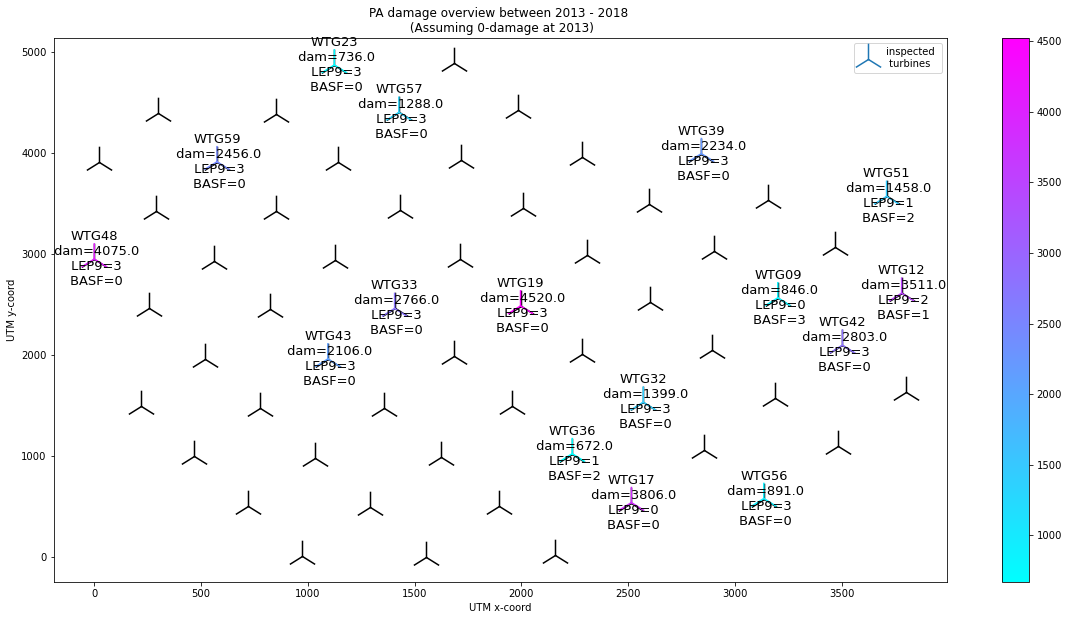

In [22]:
# Damage per turbine in the layout

plot_df = df_PA_dam.groupby(['Turbine']).sum() 

PA_latlon = pd.read_csv(os.path.join(directory,'WF_Layouts','PrincessAmalia_layout.txt'), sep=" ", header=None)
PA_latlon['Turbines'] = None
PA_latlon['Turbines'][:51] = df_2019_dam.Turbine.unique()[:51]
PA_latlon['Turbines'][51] = 'WTG52'
PA_latlon['Turbines'][52:] = df_2019_dam.Turbine.unique()[51:]

plt.figure(figsize=(20,10))
ax = plt.scatter(PA_latlon.iloc[:,0],PA_latlon.iloc[:,1], marker='2', s=1000, c='k') 

### is the damage progression per turbine somehow related to different coatings???
coating = pd.read_excel(directory+'/SCOPE2019_PA_coatings.xlsx', header=1, skiprows=0)

marker_colors = plot_df.damage_2018
PA_subset_latlon = np.array([PA_latlon[PA_latlon.Turbines==turb].iloc[:,0:2].values for turb in plot_df.index.values])[:,0]
ax = plt.scatter(PA_subset_latlon[:,0],PA_subset_latlon[:,1], marker='2', label='inspected \n turbines', s=1000,
                 c=marker_colors, cmap="cool") 

for j,turb in enumerate(plot_df.index.values):
    turb_nr = int(turb[-2:])-1
    plt.text(PA_subset_latlon[j,0], PA_subset_latlon[j,1], 
             turb+'\n dam='+str(plot_df.damage_2018[j])+'\n LEP9='+str(coating['LEP 9'][turb_nr])+'\n BASF='+str(coating['BASF'][turb_nr]),
             horizontalalignment='center', verticalalignment='center', color='k', size=13)
    

plt.legend()
plt.colorbar()
plt.xlabel('UTM x-coord')
plt.ylabel('UTM y-coord')
plt.title('PA damage overview between 2013 - 2018 \n (Assuming 0-damage at 2013)')
plt.show()

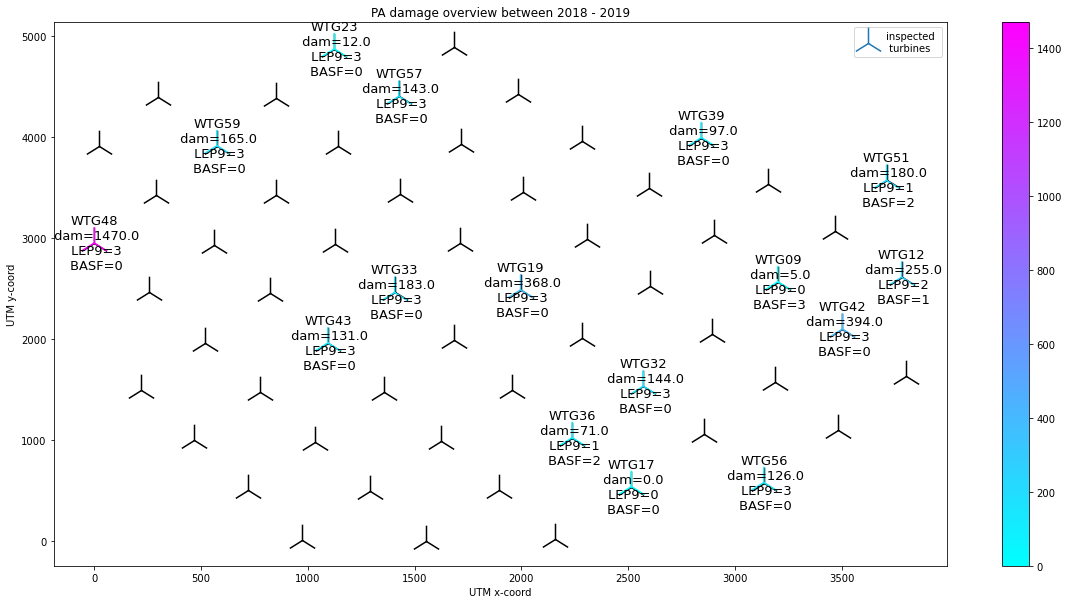

In [23]:
# Damage per turbine in the layout

plot_df = df_PA_dam.groupby(['Turbine']).sum() 

PA_latlon = pd.read_csv(os.path.join(directory,'WF_Layouts','PrincessAmalia_layout.txt'), sep=" ", header=None)
PA_latlon['Turbines'] = None
PA_latlon['Turbines'][:51] = df_2019_dam.Turbine.unique()[:51]
PA_latlon['Turbines'][51] = 'WTG52'
PA_latlon['Turbines'][52:] = df_2019_dam.Turbine.unique()[51:]

plt.figure(figsize=(20,10))
ax = plt.scatter(PA_latlon.iloc[:,0],PA_latlon.iloc[:,1], marker='2', s=1000, c='k') 

### is the damage progression per turbine somehow related to different coatings???
coating = pd.read_excel(directory+'/SCOPE2019_PA_coatings.xlsx', header=1, skiprows=0)

marker_colors = plot_df.damage_2019
PA_subset_latlon = np.array([PA_latlon[PA_latlon.Turbines==turb].iloc[:,0:2].values for turb in plot_df.index.values])[:,0]
ax = plt.scatter(PA_subset_latlon[:,0],PA_subset_latlon[:,1], marker='2', label='inspected \n turbines', s=1000,
                 c=marker_colors, cmap="cool") 

for j,turb in enumerate(plot_df.index.values):
    turb_nr = int(turb[-2:])-1
    plt.text(PA_subset_latlon[j,0], PA_subset_latlon[j,1], 
             turb+'\n dam='+str(plot_df.damage_2019[j])+'\n LEP9='+str(coating['LEP 9'][turb_nr])+'\n BASF='+str(coating['BASF'][turb_nr]),
             horizontalalignment='center', verticalalignment='center', color='k', size=13)
    

plt.legend()
plt.colorbar()
plt.xlabel('UTM x-coord')
plt.ylabel('UTM y-coord')
plt.title('PA damage overview between 2018 - 2019')
plt.show()

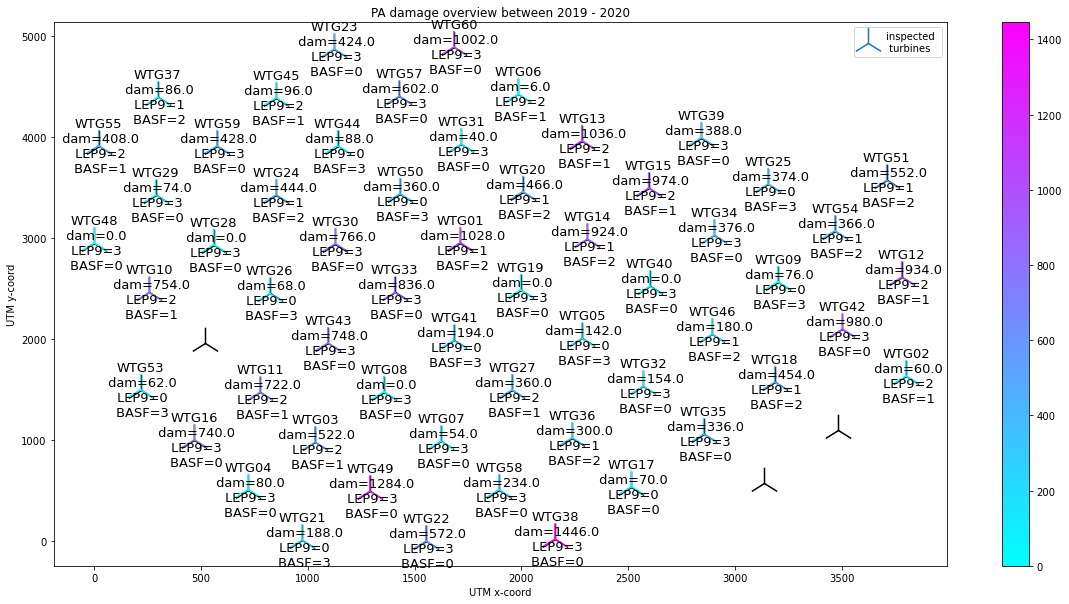

In [24]:
# Damage per turbine in the layout

plot_df_new = df_PA_dam_new.groupby(['Turbine']).sum() # or median or some other way

PA_latlon = pd.read_csv(os.path.join(directory,'WF_Layouts','PrincessAmalia_layout.txt'), sep=" ", header=None)
PA_latlon['Turbines'] = None
PA_latlon['Turbines'][:51] = df_2019_dam.Turbine.unique()[:51]
PA_latlon['Turbines'][51] = 'WTG52'
PA_latlon['Turbines'][52:] = df_2019_dam.Turbine.unique()[51:]

plt.figure(figsize=(20,10))
ax = plt.scatter(PA_latlon.iloc[:,0],PA_latlon.iloc[:,1], marker='2', s=1000, c='k') 

### is the damage progression per turbine somehow related to different coatings???
coating = pd.read_excel(directory+'/SCOPE2019_PA_coatings.xlsx', header=1, skiprows=0)

marker_colors = plot_df_new.damage_2020
PA_subset_latlon = np.array([PA_latlon[PA_latlon.Turbines==turb].iloc[:,0:2].values for turb in plot_df_new.index.values])[:,0]
ax = plt.scatter(PA_subset_latlon[:,0],PA_subset_latlon[:,1], marker='2', label='inspected \n turbines', s=1000,
                 c=marker_colors, cmap="cool") 

for j,turb in enumerate(plot_df_new.index.values):
    turb_nr = int(turb[-2:])-1
    plt.text(PA_subset_latlon[j,0], PA_subset_latlon[j,1], 
             turb+'\n dam='+str(plot_df_new.damage_2020[j])+'\n LEP9='+str(coating['LEP 9'][turb_nr])+'\n BASF='+str(coating['BASF'][turb_nr]),
             horizontalalignment='center', verticalalignment='center', color='k', size=13)
    

plt.legend()
plt.colorbar()
plt.xlabel('UTM x-coord')
plt.ylabel('UTM y-coord')
plt.title('PA damage overview between 2019 - 2020')
plt.show()

In [25]:
### Average number of inspections per turbine at 2020
df_PA_dam_new.groupby(['Turbine']).agg('count').median()

Blade              272
Severity_2019      272
defect_code2019    272
Severity_2020      272
defect_code2020    272
prog_2020          272
damage_2020        272
dtype: float64

In [26]:
### Average number of inspections per turbine at 2019
df_PA_dam.groupby(['Turbine']).agg('count').median()

Blade              292
Severity_2018      292
defect_code2018    292
Severity_2019      292
defect_code2019    292
prog_2019          292
defect_code2013    292
Severity_2013      292
prog_2018          292
damage_2019        292
damage_2018        292
dtype: float64

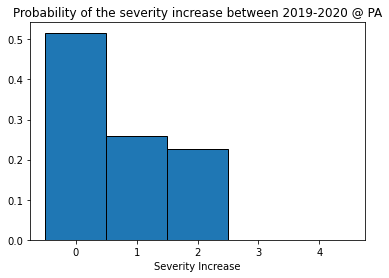

probabilities:  [0.51649819 0.25824909 0.22525272 0.         0.        ]


In [27]:
sev2020 = df_PA_dam_new[~df_PA_dam_new.prog_2020.str.startswith('-')].Severity_2020
sev2019 = df_PA_dam_new[~df_PA_dam_new.prog_2020.str.startswith('-')].Severity_2019
sev_dif = sev2020-sev2019
bins = np.arange(-0.5,5.5,1)
hist, edges = np.histogram(sev_dif, bins)
freq = hist/float(hist.sum())
plt.bar(bins[:-1],freq,width=1, align="edge", ec="k" )
plt.title('Probability of the severity increase between 2019-2020 @ PA')
plt.xlabel('Severity Increase')
plt.show()
print('probabilities: ', freq)

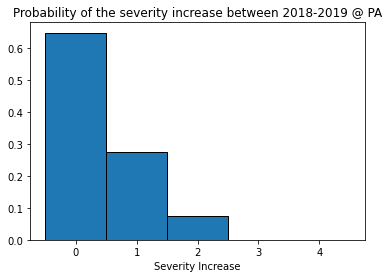

probabilities:  [0.64880113 0.27597555 0.07522332 0.         0.        ]


In [28]:
sev2019 = df_PA_dam[~df_PA_dam.prog_2019.str.startswith('-')].Severity_2019
sev2018 = df_PA_dam[~df_PA_dam.prog_2019.str.startswith('-')].Severity_2018
sev_dif = sev2019-sev2018
bins = np.arange(-0.5,5.5,1)
hist, edges = np.histogram(sev_dif, bins)
freq = hist/float(hist.sum())
plt.bar(bins[:-1],freq,width=1, align="edge", ec="k" )
plt.title('Probability of the severity increase between 2018-2019 @ PA')
plt.xlabel('Severity Increase')
plt.show()
print('probabilities: ', freq)

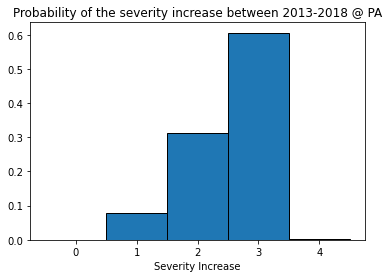

probabilities:  [0.         0.07950563 0.31138166 0.60616122 0.00295148]


In [29]:
sev2018 = df_PA_dam[~df_PA_dam.prog_2018.str.startswith('-')].Severity_2018
sev2013 = df_PA_dam[~df_PA_dam.prog_2018.str.startswith('-')].Severity_2013
sev_dif = sev2018-sev2013
bins = np.arange(-0.5,5.5,1)
hist, edges = np.histogram(sev_dif, bins)
freq = hist/float(hist.sum())
plt.bar(bins[:-1],freq,width=1, align="edge", ec="k" )
plt.title('Probability of the severity increase between 2013-2018 @ PA')
plt.xlabel('Severity Increase')
plt.show()
print('probabilities: ', freq)

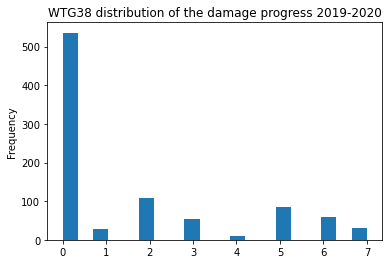

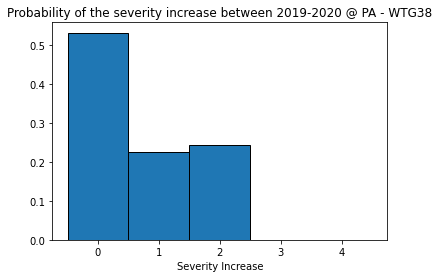

probabilities:  [0.53107345 0.2259887  0.24293785 0.         0.        ]


In [30]:
### Looking deeper into WTG38 - max damage progress between 2019-2020
df_PA_dam_new[df_PA_dam_new.Turbine=='WTG38'].damage_2020.plot(kind='hist', bins=20)
plt.title('WTG38 distribution of the damage progress 2019-2020')
plt.show()

sev2020 = df_PA_dam_new[df_PA_dam_new.Turbine=='WTG38'].Severity_2020
sev2019 = df_PA_dam_new[df_PA_dam_new.Turbine=='WTG38'].Severity_2019
sev_dif = sev2020-sev2019
bins = np.arange(-0.5,5.5,1)
hist, edges = np.histogram(sev_dif, bins)
freq = hist/float(hist.sum())
plt.bar(bins[:-1],freq,width=1, align="edge", ec="k" )
plt.title('Probability of the severity increase between 2019-2020 @ PA - WTG38')
plt.xlabel('Severity Increase')
plt.show()
print('probabilities: ', freq)

In [31]:
print('PA damage mean per turbine 2020: ' +str(df_PA_dam_new.damage_2020.sum()/len(plot_df_new)))
print('PA damage mean per turbine 2019: ' +str(df_PA_dam.damage_2019.sum()/len(plot_df)))
print('PA damage mean per turbine 2018: ' +str(df_PA_dam.damage_2018.sum()/len(plot_df)))

PA damage mean per turbine 2020: 418.56140350877195
PA damage mean per turbine 2019: 234.0
PA damage mean per turbine 2018: 2222.9375


In [32]:
Target_values_PA = pd.DataFrame({'2018':df_PA_dam.damage_2018.sum()/len(plot_df),
                                 '2019':df_PA_dam.damage_2019.sum()/len(plot_df),
                                 'total_2019':df_PA_dam.damage_2018.sum()/len(plot_df)+df_PA_dam.damage_2019.sum()/len(plot_df),
                                 '2020':df_PA_dam_new.damage_2020.sum()/len(plot_df_new),
                                 'total_2020':df_PA_dam.damage_2018.sum()/len(plot_df)+df_PA_dam.damage_2019.sum()/len(plot_df)+df_PA_dam_new.damage_2020.sum()/len(plot_df_new)},
                                index=[0])
Target_values_PA

2018  2019  total_2019  2020  total_2020
0  2223   234        2457   419        2875